#  🔍 Parser Comparison

In [1]:
import json

# Load the data
with open('repo_to_prompts.json', 'r') as f:
    repo_to_prompts = json.load(f)

# Load log classifier prompt data
with open('repo_to_prompts_logClassifier.json', 'r') as f:
    log_classifier_prompts = json.load(f)

# Load flair classifier prompt data
with open('repo_to_prompts_FLAIR.json', 'r') as f:
    flair_classifier_prompts = json.load(f)

# Load multi_heuristic prompt data
with open('prompts.json', 'r') as f:
    multi_heuristic_prompts = json.load(f)

### 📊 Unique Prompts in each dataset

In [2]:
# Prompt Benchmark (Default) -- Prompts grabbed using Ishan's Heuristic
all_prompts = []
for repo, prompts in repo_to_prompts.items():
    all_prompts.extend(prompts)
all_prompt_set = set(all_prompts)
print(f"Default ; Total number of prompts: {len(all_prompts)}, unique prompts: {len(all_prompt_set)}")

# Flair Prompts
all_flair_prompts = []
for repo, prompts in flair_classifier_prompts.items():
    all_flair_prompts.extend(prompts)
all_flair_prompts_set = set(all_flair_prompts)
print(f"Flair ; Total number of prompts: {len(all_flair_prompts)}, unique prompts: {len(all_flair_prompts_set)}")

# Log Prompts
all_log_prompts = []
for repo, prompts in log_classifier_prompts.items():
    all_log_prompts.extend(prompts)
all_log_prompts_set = set(all_log_prompts)
print(f"Log ; Total number of prompts: {len(all_log_prompts)}, unique prompts: {len(all_log_prompts_set)}")

# Multi Heuristic Prompts
multi_heuristic_prompts_set = set(multi_heuristic_prompts["prompts"])
print(f"Multi Heuristic ; Total number of prompts: {len(multi_heuristic_prompts['prompts'])}, unique prompts: {len(multi_heuristic_prompts_set)}")

Default ; Total number of prompts: 1127, unique prompts: 896
Flair ; Total number of prompts: 7401, unique prompts: 2172
Log ; Total number of prompts: 6039, unique prompts: 3841
Multi Heuristic ; Total number of prompts: 1058, unique prompts: 1058


#### 🧩 Set Differences and Intersections

# Looking at the intersection of the sets
Default AND FLAIR: 729
Default AND LOG: 771
Flair AND LOG: 1115
Default AND FLAIR AND LOG: 634

# Looking at the difference of the sets
Default - FLAIR: 167
Default - LOG: 125
FLAIR - LOG: 1057
Default - FLAIR - LOG: 30


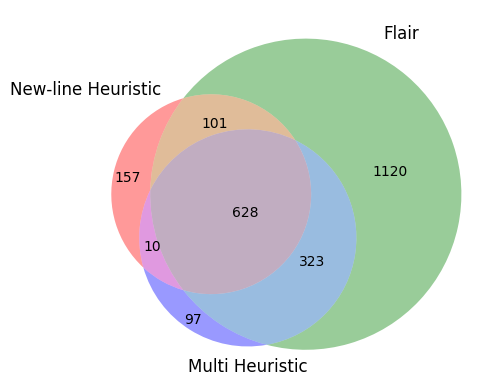

In [10]:
# Looking at the intersection of the sets
print("# Looking at the intersection of the sets")
print(f"Default AND FLAIR: {len(all_prompt_set.intersection(all_flair_prompts_set))}")
print(f"Default AND LOG: {len(all_prompt_set.intersection(all_log_prompts_set))}")
print(f"Flair AND LOG: {len(all_flair_prompts_set.intersection(all_log_prompts_set))}")
print(f"Default AND FLAIR AND LOG: {len(all_prompt_set.intersection(all_flair_prompts_set, all_log_prompts_set))}")
print("")

# Looking at the difference of the sets
print("# Looking at the difference of the sets")
print(f"Default - FLAIR: {len(all_prompt_set.difference(all_flair_prompts_set))}")
print(f"Default - LOG: {len(all_prompt_set.difference(all_log_prompts_set))}")
print(f"FLAIR - LOG: {len(all_flair_prompts_set.difference(all_log_prompts_set))}")
print(f"Default - FLAIR - LOG: {len(all_prompt_set.difference(all_flair_prompts_set, all_log_prompts_set))}")

# Make Venn Diagram
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Make Venn Diagram
# plt.figure(figsize=(4,4))
venn3([all_prompt_set, all_flair_prompts_set, multi_heuristic_prompts_set], ('New-line Heuristic', 'Flair', 'Multi Heuristic'))
plt.show()

### Verifying the result for the new-line heuristic

In [11]:
# Prompts in Default but not in Flair set
all_prompt_set.intersection(all_flair_prompts_set).difference(multi_heuristic_prompts_set)

{'"""\n            #  <center> \\N{fire} Chatbot Langchain with LLM on PAI ! \n\n            ### <center> \\N{rocket} Build your own personalized knowledge base question-answering chatbot. \n                        \n            <center> \n            \n            \\N{fire} Platform: [PAI](https://help.aliyun.com/zh/pai)  /  [PAI-EAS](https://www.aliyun.com/product/bigdata/learn/eas)  / [PAI-DSW](https://pai.console.aliyun.com/notebook)\n            \n            \\N{rocket} Supported VectorStores:  [Hologres](https://www.aliyun.com/product/bigdata/hologram)  /  [ElasticSearch](https://www.aliyun.com/product/bigdata/elasticsearch)  /  [AnalyticDB](https://www.aliyun.com/product/apsaradb/gpdb)  /  [FAISS](https://python.langchain.com/docs/integrations/vectorstores/faiss)\n                \n            """',
 '"""\n      #col-container {max-width: 80%; margin-left: auto; margin-right: auto;}\n      #video_inp {min-height: 100px}\n      #chatbox {min-height: 100px;}\n      #header {text-

In [12]:
multi_heuristic_prompts_set.difference(all_flair_prompts_set)

{'',
 '"""\n\nFor instance:\n\nQuestion: Find out how much 2 plus 2 is.\nThought: I must use the Python shell to calculate 2 + 2\nAction: Python REPL\nAction Input: \n2 + 2\nObservation: 4\n\nThought: I now know the answer\nFinal Answer: 4\n\nExample 2:\nQuestion: You have a variable age in your scope. If it\'s greater or equal than 21, say OK. Else, say Nay.\nThought: I should write an if/else block in the Python shell.\nAction: Python REPL\nAction Input:\nif age >= 21:\n    print("OK")  # this line has four spaces at the beginning\nelse:\n    print("Nay")  # this line has four spaces at the beginning\n\nObservation: OK\nThought: I have executed the task successfully.\nFinal Answer: I have executed the task successfully.\n\nExample 3:\n\nQuestion: Write and execute a script that sleeps for 2 seconds and prints \'Hello, World\'\nThought: I should import the sleep function.\nAction: Python REPL\nAction Input: \nfrom time import sleep\nObservation: \n\nThought: I should call the sleep fu

# 🔍 **Analyzing Results**

Prompt Count vs. Repo Count

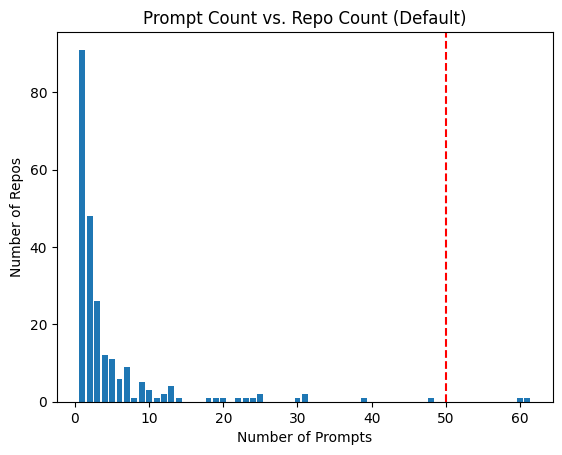

Number of repos with more than 50 prompts: 2


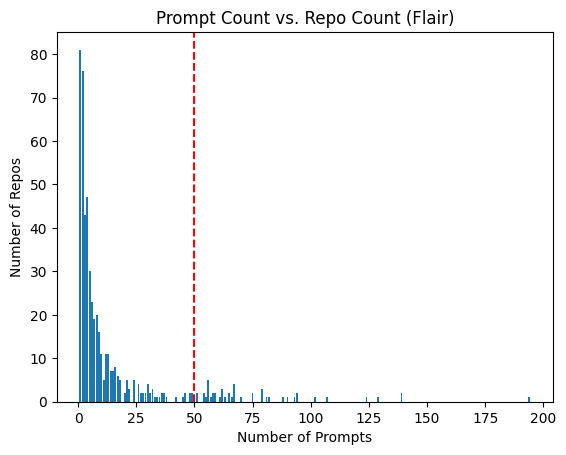

Number of repos with more than 50 prompts: 47


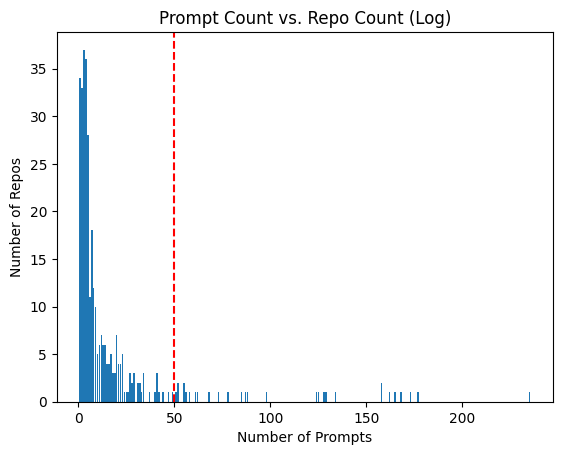

Number of repos with more than 50 prompts: 29


In [13]:
# Plot the distribution of prompt lengths
import matplotlib.pyplot as plt

def plot(repo_to_prompts, threshold=50, title="Prompt Count vs. Repo Count"):
    repo_to_promptCount = {}
    for repo in repo_to_prompts:
        repo_to_promptCount[repo] = len(repo_to_prompts[repo])

    # Prompt Count to Repo Count
    promptCount_to_repoCount = {}
    for repo in repo_to_promptCount:
        promptCount = repo_to_promptCount[repo]
        promptCount_to_repoCount[promptCount] = promptCount_to_repoCount.get(promptCount, 0) + 1

    # Plot the distribution of prompt lengths
    # plt.figure(figsize=(20,10))
    plt.bar(promptCount_to_repoCount.keys(), promptCount_to_repoCount.values())
    plt.xlabel("Number of Prompts")
    plt.ylabel("Number of Repos")

    # Draw a line at the threshold
    plt.axvline(x=threshold, color='r', linestyle='--')

    plt.title(title)
    plt.show()

    count = 0
    for repo in repo_to_promptCount:
        if repo_to_promptCount[repo] > threshold:
            # print(repo, repo_to_promptCount[repo])
            count += 1
    print(f"Number of repos with more than {threshold} prompts: {count}")

plot(repo_to_prompts, title="Prompt Count vs. Repo Count (Default)")
plot(flair_classifier_prompts, title="Prompt Count vs. Repo Count (Flair)")
plot(log_classifier_prompts, title="Prompt Count vs. Repo Count (Log)")

# 🤔 **Looking at 0 Star Repositories for further testing**

Since Flair was trained on part of the Default dataset, it's fair to test those parsers on completely new data.

In [14]:
import json, requests, os

# Import Raw URLs
with open("../data/repo_to_rawFileURL_>=0stars.json", "r") as file:
    repos_prompts = json.load(file)


# NOTE: Refer to this stackoverflow post for issues with requests: 
# https://stackoverflow.com/questions/62599036/python-requests-is-slow-and-takes-very-long-to-complete-http-or-https-request

root_dir = "repos_0stars"
if not os.path.exists(root_dir):
    os.mkdir(root_dir)

# Note: Using '~' instead of '/' as a delimiter for file/dir names 
# (because I'm not creative enough to come up with a better solution)
for repo in repos_prompts:
    repo_path = os.path.join(root_dir, repo.replace("/", "~"))
    if not os.path.exists(repo_path):
        os.mkdir(repo_path)

    for url in repos_prompts[repo]:
        filename = url.split("/")[6:]
        filename = "~".join(filename)
        file_path = os.path.join(repo_path, filename)
        
        if not os.path.exists(file_path):
            try:
                r = requests.get(url, timeout=1)
                # Exception thrown before file is created. 
                # So, if file exists, it's safe to assume that it's been downloaded successfully.
                if r.status_code == 200:
                    with open(file_path, "w") as f:
                        f.write(r.text)
                else:
                    print("Error: ", r.status_code, repo_path, filename)
            except Exception as e:
                print(e)
                print("Error: ", repo_path, filename)

print("Done")

Done


### 🧠 Sanity Check

In [15]:
# Count the number of repos in the repos directory
assert len(os.listdir(root_dir)) == len(repos_prompts)
print(f"Number of repos: {len(os.listdir(root_dir))} ; Expected {len(repos_prompts)} for repos >=0stars")

# Count the number of files in each repo
count = 0
expected_count = 0
for repo in repos_prompts:
    repo_path = os.path.join(root_dir, repo.replace("/", "~"))
    assert len(os.listdir(repo_path)) == len(repos_prompts[repo])
    for file in os.listdir(repo_path):
        with open(os.path.join(repo_path, file), "r") as f:
            assert f.read() != ""  # Complain if file is empty
    count += len(os.listdir(repo_path))
    expected_count += len(repos_prompts[repo])
print(f"Total number of files: {count} ; Expected {expected_count} for repos >=0stars")

Number of repos: 108 ; Expected 108 for repos >=0stars
Total number of files: 635 ; Expected 635 for repos >=0stars


### 🔍 All Prompt Parsers

In [16]:
# Use the Language.build_library method to compile these into a library that's usable from Python. 
# This function will return immediately if the library has already been compiled since the last 
# time its source code was modified:

from tree_sitter import Language, Parser
import os

# Ensuring that the library is compiled each time this cell is run.
if os.path.exists("build/my-languages.so"):
    os.remove("build/my-languages.so")

Language.build_library(
    # Store the library in the `build` directory
    "build/my-languages.so",
    # Include one or more languages
    ["vendor/tree-sitter-python"],
)

# DEFAULT PARSER (ISHAN'S HEURISTIC) ##########################################
def parse(filename):
    PY_LANGUAGE = Language('./build/my-languages.so', 'python')
    parser = Parser()
    parser.set_language(PY_LANGUAGE)
    result = []

    with open(filename, "rb") as f:
        tree = parser.parse(f.read())

    query = PY_LANGUAGE.query("""
        (expression_statement
            (assignment
                left: (identifier) @var.name
                right: (string) @var.value
            )
        )
    """)

    for usage in query.captures(tree.root_node):
        if usage[1] == "var.value":
            # heuristic, check if length of string is >= 30 chars, if so then it's probably a prompt
            # res = usage[0].text.decode("utf-8") + "\n"
            # if len(res) >= 30:
            #     result += res

            # heuristic, check if string has a newline in it, if so then it's probably a prompt
            res = usage[0].text.decode("utf-8")
            if "\n" in res:
                result.append(res)

    return result

# Log PARSER ################################################################
# Load log classifier
import pickle
with open('log_classifier.pkl', 'rb') as f:
    log_classifier = pickle.load(f)

def is_llm_prompt(text, classifier):
    prediction = classifier.predict([text])
    return prediction[0] == 1

def parse_log_classifier(filename):
    PY_LANGUAGE = Language('./build/my-languages.so', 'python')
    parser = Parser()
    parser.set_language(PY_LANGUAGE)
    result = []

    with open(filename, "rb") as f:
        tree = parser.parse(f.read())

    def traverse(node):
        if node.type == "string" and len(node.text.decode("utf-8")) > 0:
            # convert bytes to string, and add to list
            string = node.text.decode("utf-8")

            if is_llm_prompt(string, log_classifier):
                result.append(string)
            
        for child in node.children:
            traverse(child)

    traverse(tree.root_node)

    return result

# FLAIR PARSER ###############################################################
from flair.data import Sentence
from flair.models import TextClassifier

# Load Classifier
classifier = TextClassifier.load('resources/classifiers/dj_classifier/final-model.pt')
def parse_flair(filename, classifier):
    PY_LANGUAGE = Language('./build/my-languages.so', 'python')
    parser = Parser()
    parser.set_language(PY_LANGUAGE)
    result = []

    with open(filename, "rb") as f:
        tree = parser.parse(f.read())

    # cursor = tree.walk()  Not using this for tree-traversal

    # Alternative method
    def traverse(node):
        if node.type == "string" and len(node.text.decode("utf-8")) > 0:
            # convert bytes to string, and add to list
            string = node.text.decode("utf-8")

            # create sentence object and predict
            sentence = Sentence(string)  
            classifier.predict(sentence)

            # check if sentence is a prompt
            if len(sentence.labels) > 1:
                raise Exception("More than one label")
            if len(sentence.labels) > 0 and sentence.labels[0].value == '1' and sentence.labels[0].score > 0.95:
                # print(sentence.labels)
                result.append(string)
            
        for child in node.children:
            traverse(child)

    traverse(tree.root_node)

    return result

/home/dpaul/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dpaul/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### **Getting Prompts** 
From 0 Star Repositories (with all 3 parsers)

In [17]:
root_dir = "repos_0stars"
repo_to_prompts = {}
repo_to_prompts_logClassifier = {}
repo_to_prompts_flair = {}
count = 0
count_log = 0
count_flair = 0

repo_count = 0
for repo in os.listdir(root_dir):
    repo_path = os.path.join(root_dir, repo)
    for file in os.listdir(repo_path):
        file_path = os.path.join(repo_path, file)
        try:
            prompt = parse(file_path)
            prompt_log = parse_log_classifier(file_path)
            prompt_flair = parse_flair(file_path, classifier)
            if len(prompt) > 0:
                count += 1
                val = repo_to_prompts.get(repo, [])
                val.extend(prompt)
                repo_to_prompts[repo] = val
            if len(prompt_log) > 0:
                count_log += 1
                val = repo_to_prompts_logClassifier.get(repo, [])
                val.extend(prompt_log)
                repo_to_prompts_logClassifier[repo] = val
            if len(prompt_flair) > 0:
                count_flair += 1
                val = repo_to_prompts_flair.get(repo, [])
                val.extend(prompt_flair)
                repo_to_prompts_flair[repo] = val
        except Exception as e:
            print(e)
            print("Error: ", repo_path, file_path)
    repo_count += 1
    if repo_count % 10 == 0:
        print(f"Finished {repo_count} repos")

# Save repo_to_prompts (according to flair) as a json file
import json
with open('repo_to_prompts_0stars.json', 'w') as f:
    json.dump(repo_to_prompts, f)
with open('repo_to_prompts_0stars_logClassifier.json', 'w') as f:
    json.dump(repo_to_prompts_logClassifier, f)
with open('repo_to_prompts_0stars_FLAIR.json', 'w') as f:
    json.dump(repo_to_prompts_flair, f)

print(f"Parser Returns result for {count} files out of 635 files")
print(f"Parser_log Returns result for {count_log} files out of 635 files")
print(f"Parser_flair Returns result for {count_flair} files out of 635 files")


Finished 10 repos
Finished 20 repos
Finished 30 repos
Finished 40 repos
Finished 50 repos
Finished 60 repos
Finished 70 repos
Finished 80 repos
Finished 90 repos
Finished 100 repos
Parser Returns result for 354 files out of 635 files
Parser_log Returns result for 571 files out of 635 files
Parser_flair Returns result for 498 files out of 635 files
Multi Heuristic Returns result for 283 files out of 635 files


In [19]:
# Load data from prompts_0stars.json (latest parser)
with open('prompts_0stars.json', 'r') as f:
    multi_heuristic_prompts_0stars = json.load(f)
    multi_heuristic_prompts_0stars = multi_heuristic_prompts_0stars["prompts"]
print(f"Multi Heuristic Returns result for {len(multi_heuristic_prompts_0stars)} files out of 635 files")

Multi Heuristic Returns result for 220 files out of 635 files


### Comparison

Default ; Total number of prompts: 823, unique prompts: 240
Flair ; Total number of prompts: 1522, unique prompts: 391
Log ; Total number of prompts: 3074, unique prompts: 889
Log ; Total number of prompts: 220, unique prompts: 220


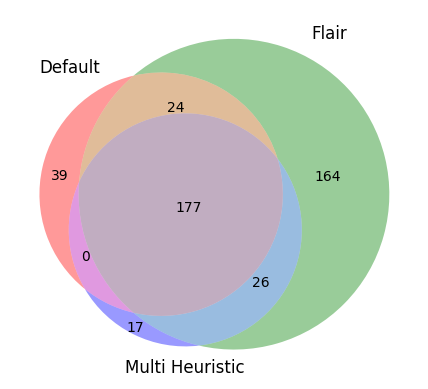

In [20]:
import json

# Load the data
with open('repo_to_prompts_0stars.json', 'r') as f:
    repo_to_prompts = json.load(f)

# Load log classifier prompt data
with open('repo_to_prompts_0stars_logClassifier.json', 'r') as f:
    log_classifier_prompts = json.load(f)

# Load flair classifier prompt data
with open('repo_to_prompts_0stars_FLAIR.json', 'r') as f:
    flair_classifier_prompts = json.load(f)

# Prompt Benchmark (Default) -- Prompts grabbed using Ishan's Heuristic
all_prompts = []
for repo, prompts in repo_to_prompts.items():
    all_prompts.extend(prompts)
all_prompt_set = set(all_prompts)
print(f"Default ; Total number of prompts: {len(all_prompts)}, unique prompts: {len(all_prompt_set)}")

# Flair Prompts
all_flair_prompts = []
for repo, prompts in flair_classifier_prompts.items():
    all_flair_prompts.extend(prompts)
all_flair_prompts_set = set(all_flair_prompts)
print(f"Flair ; Total number of prompts: {len(all_flair_prompts)}, unique prompts: {len(all_flair_prompts_set)}")

# Log Prompts
all_log_prompts = []
for repo, prompts in log_classifier_prompts.items():
    all_log_prompts.extend(prompts)
all_log_prompts_set = set(all_log_prompts)
print(f"Log ; Total number of prompts: {len(all_log_prompts)}, unique prompts: {len(all_log_prompts_set)}")

# Multi Heuristic Prompts
multi_heuristic_prompts_0stars_set = set(multi_heuristic_prompts_0stars)
print(f"Log ; Total number of prompts: {len(multi_heuristic_prompts_0stars)}, unique prompts: {len(multi_heuristic_prompts_0stars_set)}")

# Make Venn Diagram
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
venn3([all_prompt_set, all_flair_prompts_set, multi_heuristic_prompts_0stars_set], ('Default', 'Flair', 'Multi Heuristic'))
plt.show()

In [21]:
all_prompt_set.intersection(all_flair_prompts_set).difference(multi_heuristic_prompts_0stars_set)

{'"""\n"""',
 '"""\nUser: {query}\nAI: """',
 '"""\r\n    =====Start of example 1 =====\r\n    YOUR CURRENT OBJECTIVE: What is the price of HP Inkjet Fax Machine\r\n    PREVIOUS ACTION: None\r\n    Observation:\r\n    URL: http://onestopmarket.com/office-products/office-electronics.html\r\n    Accessibility tree:\r\n    [1744] link \'HP CB782A#ABA 640 Inkjet Fax Machine (Renewed)\'\r\n            [1749] StaticText \'$279.49\'\r\n            [1757] button \'Add to Cart\'\r\n            [1760] button \'Add to Wish List\'\r\n            [1761] button \'Add to Compare\'\r\n\r\n    Thought: Let\'s think step-by-step. This page list the information of HP Inkjet Fax Machine, which is the product identified in the objective. Its price is $279.49. I think I have achieved the objective. I will issue the stop action with the answer.\r\n    Action:\r\n    ```\r\n    {{\r\n      "action": "stop",\r\n      "action_input": {{"final_answer" : "$279.49"}}\r\n    }}\r\n    ```\r\n    =====End of example

### Analysizing Results, again

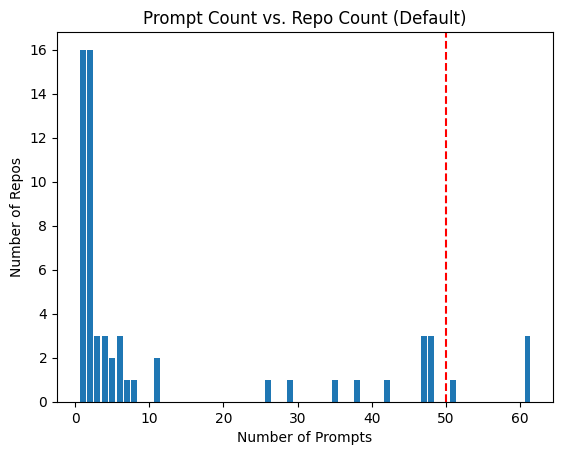

Number of repos with more than 50 prompts: 4


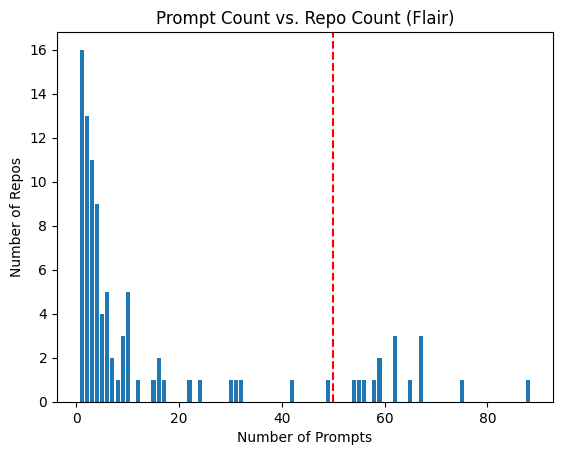

Number of repos with more than 50 prompts: 15


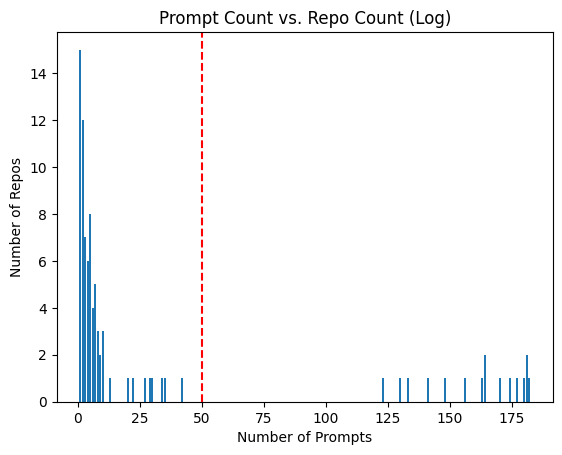

Number of repos with more than 50 prompts: 16


In [22]:
# Plot the distribution of prompt lengths
import matplotlib.pyplot as plt

def plot(repo_to_prompts, threshold=50, title="Prompt Count vs. Repo Count"):
    repo_to_promptCount = {}
    for repo in repo_to_prompts:
        repo_to_promptCount[repo] = len(repo_to_prompts[repo])

    # Prompt Count to Repo Count
    promptCount_to_repoCount = {}
    for repo in repo_to_promptCount:
        promptCount = repo_to_promptCount[repo]
        promptCount_to_repoCount[promptCount] = promptCount_to_repoCount.get(promptCount, 0) + 1

    # Plot the distribution of prompt lengths
    # plt.figure(figsize=(20,10))
    plt.bar(promptCount_to_repoCount.keys(), promptCount_to_repoCount.values())
    plt.xlabel("Number of Prompts")
    plt.ylabel("Number of Repos")

    # Draw a line at the threshold
    plt.axvline(x=threshold, color='r', linestyle='--')

    plt.title(title)
    plt.show()

    count = 0
    for repo in repo_to_promptCount:
        if repo_to_promptCount[repo] > threshold:
            # print(repo, repo_to_promptCount[repo])
            count += 1
    print(f"Number of repos with more than {threshold} prompts: {count}")

plot(repo_to_prompts, title="Prompt Count vs. Repo Count (Default)")
plot(flair_classifier_prompts, title="Prompt Count vs. Repo Count (Flair)")
plot(log_classifier_prompts, title="Prompt Count vs. Repo Count (Log)")